# Sentiment Analysis and ML Model Building

## Import Necessary Libraries

In [33]:
import pandas as pd
from pre_process import preprocess, analyze_sentiment
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

## Read the File

In [18]:
ola = pd.read_csv('../Feedback/Data/Ola Customer Reviews.csv',usecols = ['review_description','rating'], dtype = {'rating':'category'},encoding = 'utf-8')

In [19]:
ola.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357698 entries, 0 to 357697
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   review_description  357678 non-null  object  
 1   rating              357698 non-null  category
dtypes: category(1), object(1)
memory usage: 54.5 MB


## Preprocess

In [20]:
ola.dropna(inplace = True) # Drop the Null Values

In [21]:
ola['review_description'] = ola['review_description'].apply(preprocess) # Clean the text

In [23]:
ola['sentiment'] = ola['review_description'].apply(analyze_sentiment,competitors = 'uber') # Assigning sentiments

In [24]:
tfidf = TfidfVectorizer(max_features = 10000) # For model Building

x_text = tfidf.fit_transform(ola['review_description'])
y = ola['sentiment']

In [25]:
scale = StandardScaler() # Scaling the Rating
x_rating = scale.fit_transform(ola[['rating']])

In [26]:
x = hstack([x_text,x_rating]) # To combine Vectorized data and Scaled Data

## Model Building

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

### **Logistic Regression**

In [28]:
model = LogisticRegression(solver = 'saga', max_iter = 100)

In [29]:
model.fit(x_train,y_train)

LogisticRegression(solver='saga')

In [30]:
pred = model.predict(x_test)

In [31]:
accuracy = accuracy_score(y_test,pred)

print(f"The accuracy of Logistic Regression: {round(accuracy,2)}")

The accuracy of Logistic Regression: 0.96


In [32]:
report = classification_report(y_test,pred)
print(f"The classification report of Logistic Regression:\n {report}")

The classification report of Logistic Regression:
               precision    recall  f1-score   support

    negative       0.96      0.97      0.96     22968
     neutral       0.93      0.94      0.94     16119
    positive       0.97      0.96      0.96     32449

    accuracy                           0.96     71536
   macro avg       0.95      0.96      0.95     71536
weighted avg       0.96      0.96      0.96     71536



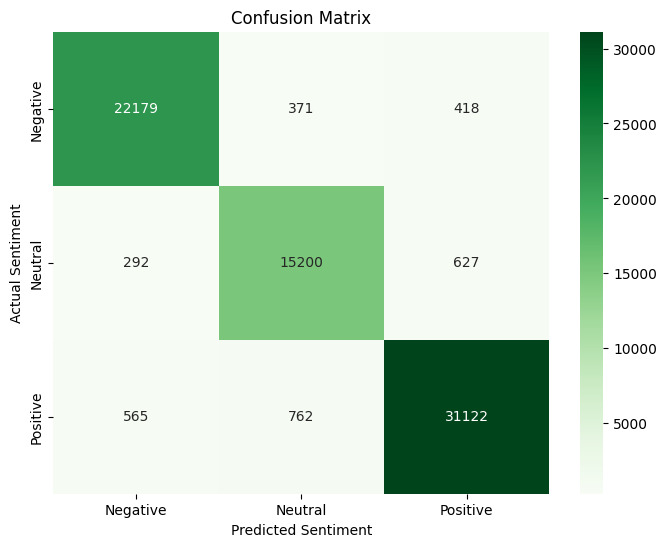

In [37]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greens', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Actual Sentiment')
plt.show()

### *Observation*:

- The Accuracy of the Logistic Model is `96%`.

**Precision:** It shows predicted instances were actually correct.

- For Negative reviews, the model correctly predicted 96% of the times when it said a review was negative.
- For Neutral reviews, it predicted 93% of the times correctly.
- For Positive reviews, the model was very accurate with 97%.

**Recall:** It shows actual instances were correctly predicted

- For Negative reviews, recall is 97%, meaning 97% of actual negative reviews were correctly identified.
- For Neutral reviews, recall is 94%.
- For Positive reviews, recall is 96%.

**F1-Score:** It is a Balanced metric that takes both `Precision` and `Recall` into account
- For Negative reviews, the F1-Score is 0.96, showing a strong balance of precision and recall.
- For Neutral reviews, it’s slightly lower at 0.94.
- For Positive reviews, the F1-Score is 0.96, indicating that the model performs well on this class.

**Macro Average:** The macro average gives an equally weighted average of precision, recall, and F1-Score for all classes, regardless of their frequency.

- This suggests that the model has good performance across all classes, but might be slightly better at identifying `positive` reviews due to its higher support

**Weighted Average:** The weighted average gives more weight to the classes with higher support (larger number of instances), and since Positive reviews have the highest support, this metric reflects that class more.

- This suggests that the overall model performance is consistent and strong, especially for larger classes like `Positive`.




In [30]:
joblib.dump(model,'Model/logistic_model.pkl')
joblib.dump(tfidf,'Model/tfidf.pkl')
joblib.dump(scale,'Model/scale.pkl')

['Model/scale.pkl']

***Save the `Logistic_model`, `tfidfTokenizer` and `scaler`***